In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-online-gaming-behavior-dataset/online_gaming_behavior_dataset.csv


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
df = pd.read_csv("/kaggle/input/predict-online-gaming-behavior-dataset/online_gaming_behavior_dataset.csv")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

In [11]:
df.shape

(40034, 13)

In [12]:
df.describe(include='all')

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
count,40034.000000,40034.000000,40034,40034,40034,40034.000000,40034.000000,40034,40034.000000,40034.000000,40034.000000,40034.000000,40034
unique,NaN,NaN,2,4,5,NaN,NaN,3,NaN,NaN,NaN,NaN,3
top,NaN,NaN,Male,USA,Sports,NaN,NaN,Easy,NaN,NaN,NaN,NaN,Medium
freq,NaN,NaN,23959,16000,8048,NaN,NaN,20015,NaN,NaN,NaN,NaN,19374
mean,29016.500000,31.992531,NaN,NaN,NaN,12.024365,0.200854,NaN,9.471774,94.792252,49.655568,24.526477,NaN
std,11556.964675,10.043227,NaN,NaN,NaN,6.914638,0.400644,NaN,5.763667,49.011375,28.588379,14.430726,NaN
min,9000.000000,15.000000,NaN,NaN,NaN,0.000115,0.000000,NaN,0.000000,10.000000,1.000000,0.000000,NaN
25%,19008.250000,23.000000,NaN,NaN,NaN,6.067501,0.000000,NaN,4.000000,52.000000,25.000000,12.000000,NaN
50%,29016.500000,32.000000,NaN,NaN,NaN,12.008002,0.000000,NaN,9.000000,95.000000,49.000000,25.000000,NaN
75%,39024.750000,41.000000,NaN,NaN,NaN,17.963831,0.000000,NaN,14.000000,137.000000,74.000000,37.000000,NaN


In [13]:
df.isnull().sum(axis=0)

PlayerID                     0
Age                          0
Gender                       0
Location                     0
GameGenre                    0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
dtype: int64

In [14]:
df = df.drop(columns=['PlayerID'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        40034 non-null  int64  
 1   Gender                     40034 non-null  object 
 2   Location                   40034 non-null  object 
 3   GameGenre                  40034 non-null  object 
 4   PlayTimeHours              40034 non-null  float64
 5   InGamePurchases            40034 non-null  int64  
 6   GameDifficulty             40034 non-null  object 
 7   SessionsPerWeek            40034 non-null  int64  
 8   AvgSessionDurationMinutes  40034 non-null  int64  
 9   PlayerLevel                40034 non-null  int64  
 10  AchievementsUnlocked       40034 non-null  int64  
 11  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 3.7+ MB


In [16]:
df.head()

,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


In [17]:
# Identifying numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Identifying categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Printing the column names
print("Numeric Columns: ", numeric_cols)
print("Categorical Columns: ", categorical_cols)

Numeric Columns:  Index(['Age', 'PlayTimeHours', 'InGamePurchases', 'SessionsPerWeek',
       'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked'],
      dtype='object')
Categorical Columns:  Index(['Gender', 'Location', 'GameGenre', 'GameDifficulty', 'EngagementLevel'], dtype='object')


In [18]:
# Iterate over identified categorical columns
for col in categorical_cols:
    # Print column name
    print(f'Categorical Column: {col}')
    
    # Find unique values
    unique_vals = df[col].unique()
    
    # Print unique values
    for val in unique_vals:
        print(f'- {val}')
    
    # Print a separator for better readability
    print('\n---\n')

Categorical Column: Gender
- Male
- Female

---

Categorical Column: Location
- Other
- USA
- Europe
- Asia

---

Categorical Column: GameGenre
- Strategy
- Sports
- Action
- RPG
- Simulation

---

Categorical Column: GameDifficulty
- Medium
- Easy
- Hard

---

Categorical Column: EngagementLevel
- Medium
- High
- Low

---



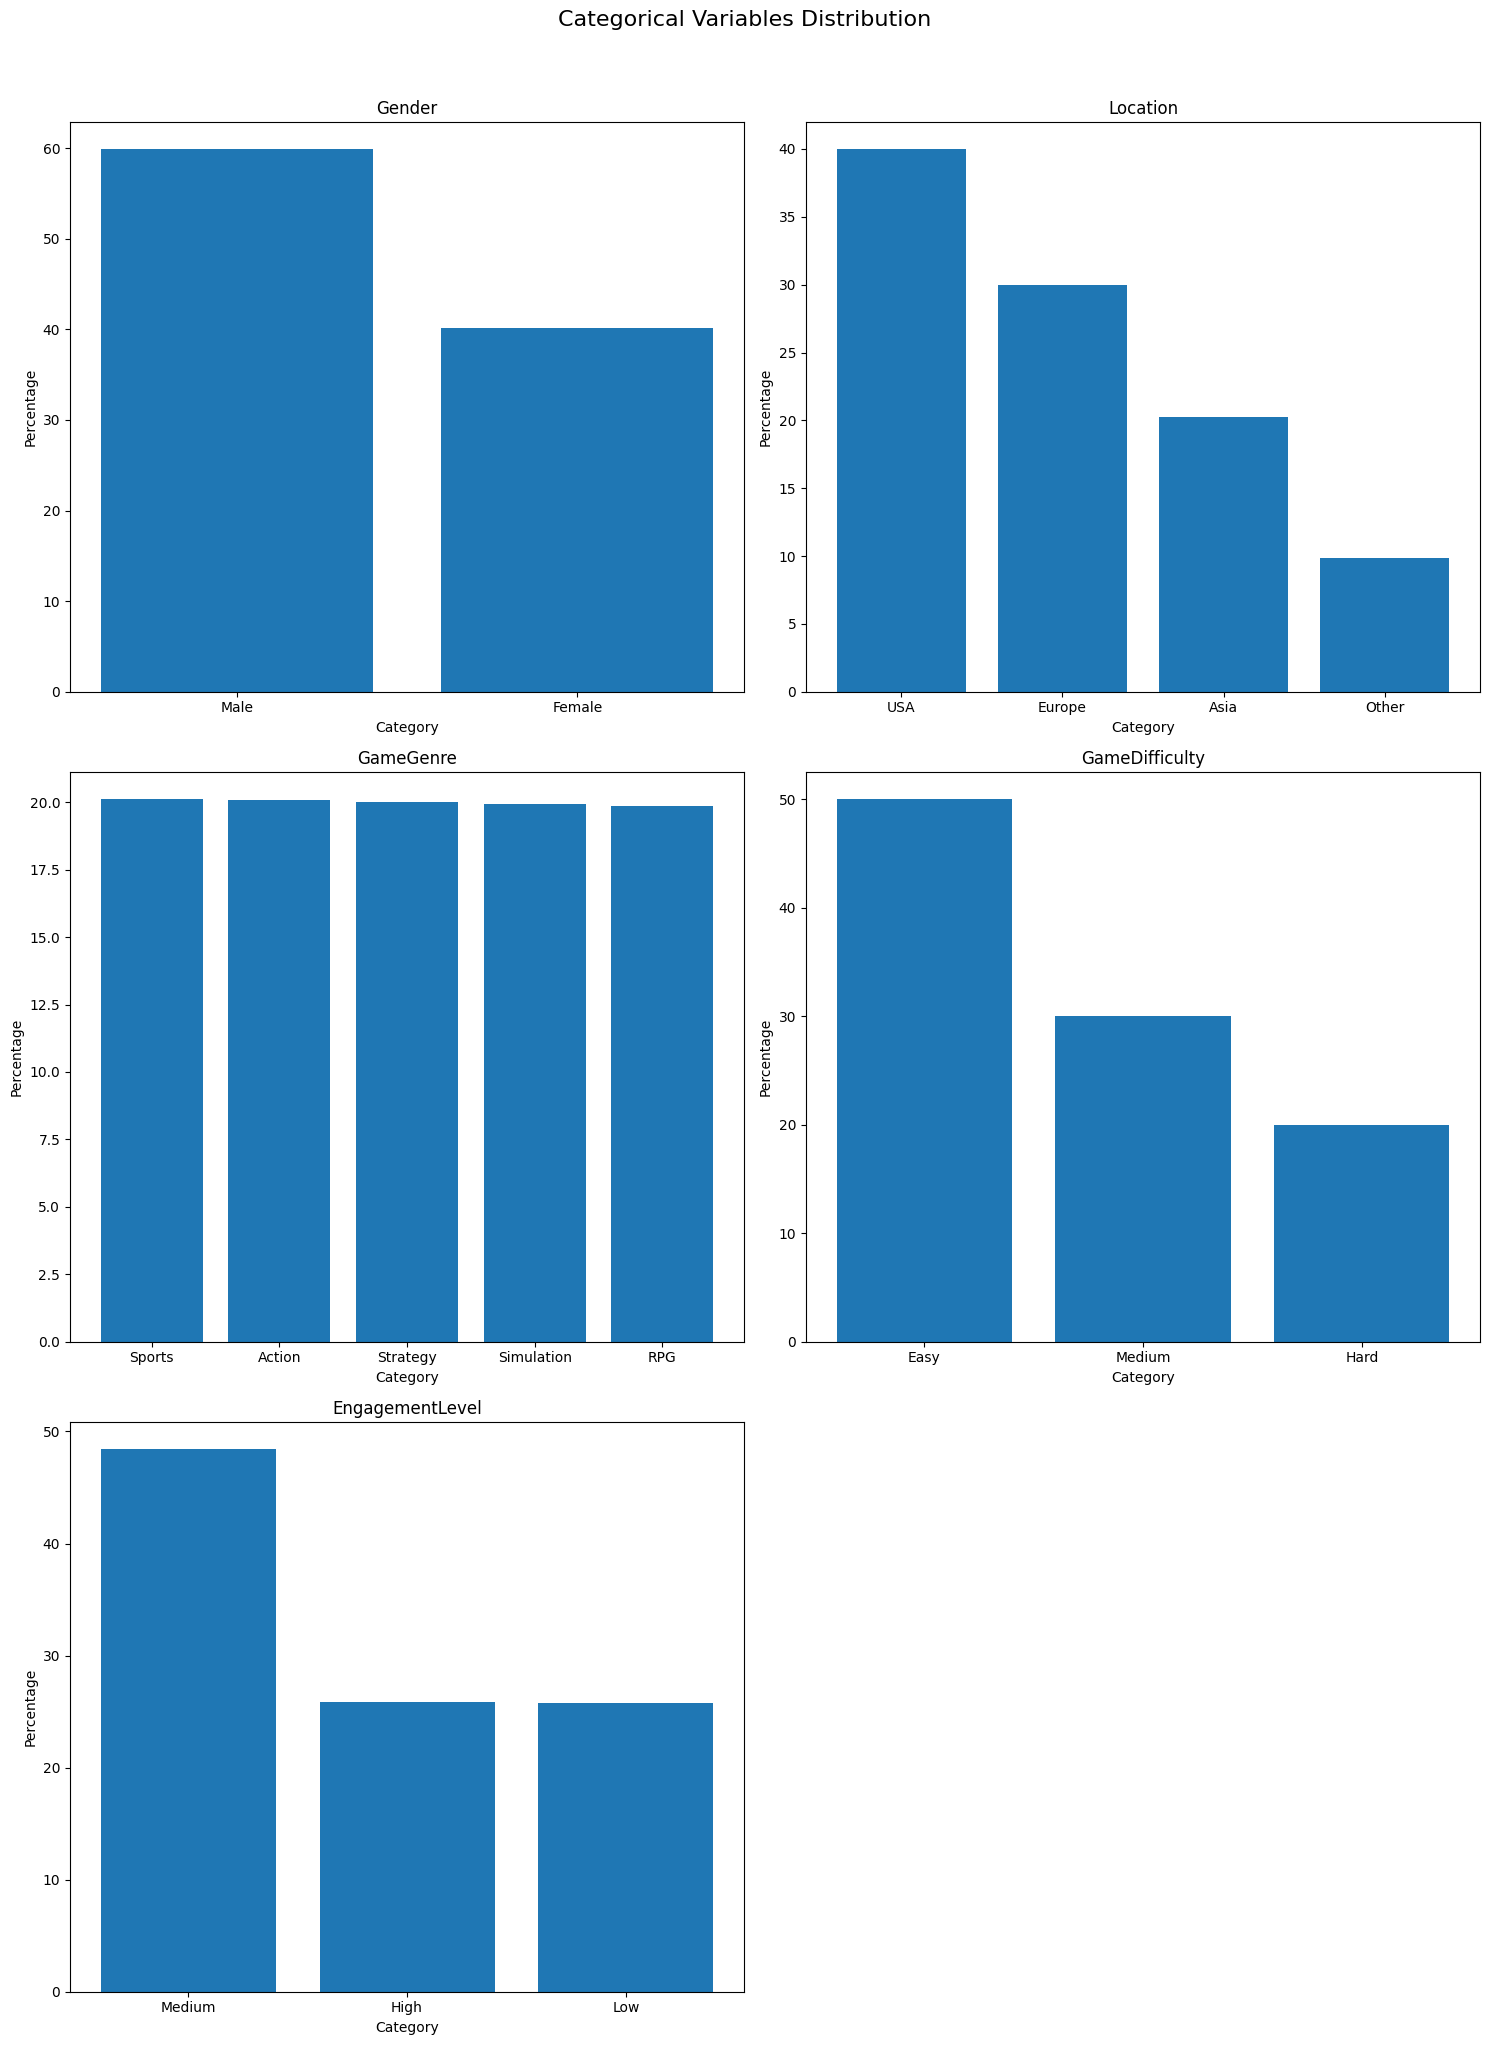

In [19]:
if len(categorical_cols) > 0:
    # Create subplots
    fig, axs = plt.subplots((len(categorical_cols) + 1) // 2, 2, figsize=(15, 20))
    axs = axs.flatten()

    for i, col in enumerate(categorical_cols):
        vc = df[col].value_counts(normalize=True) * 100  # percentage
        axs[i].bar(vc.index.astype(str), vc)  # x, y
        axs[i].set_title(col, fontsize=12)  # title
        axs[i].set_xlabel('Category')
        axs[i].set_ylabel('Percentage')

    # Remove any unused subplots
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    plt.suptitle('Categorical Variables Distribution', fontsize=16, y=1.02)
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()
else:
    print("No categorical columns found.")


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


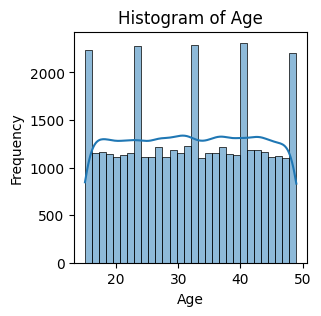

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


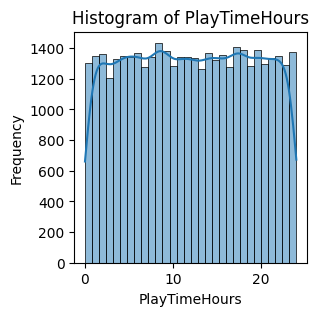

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


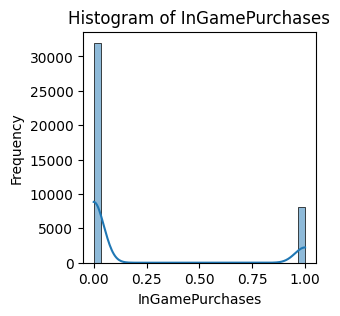

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


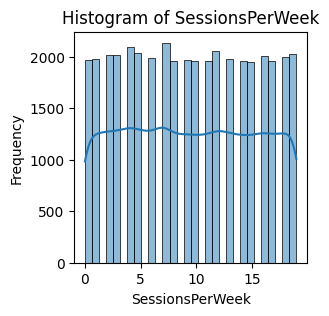

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


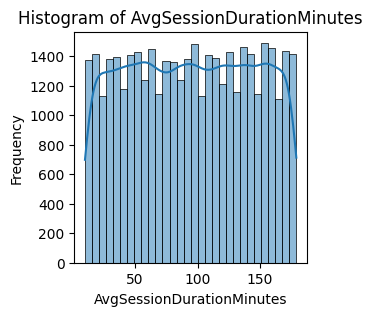

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


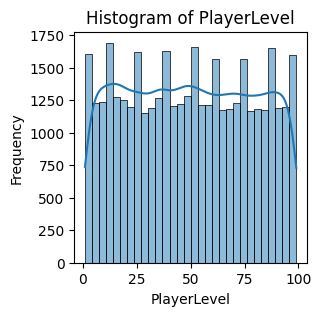

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


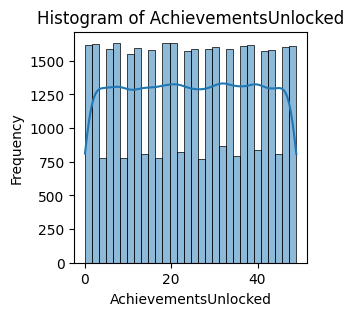

In [20]:
for col in numeric_cols:
    plt.figure(figsize=(3, 3))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

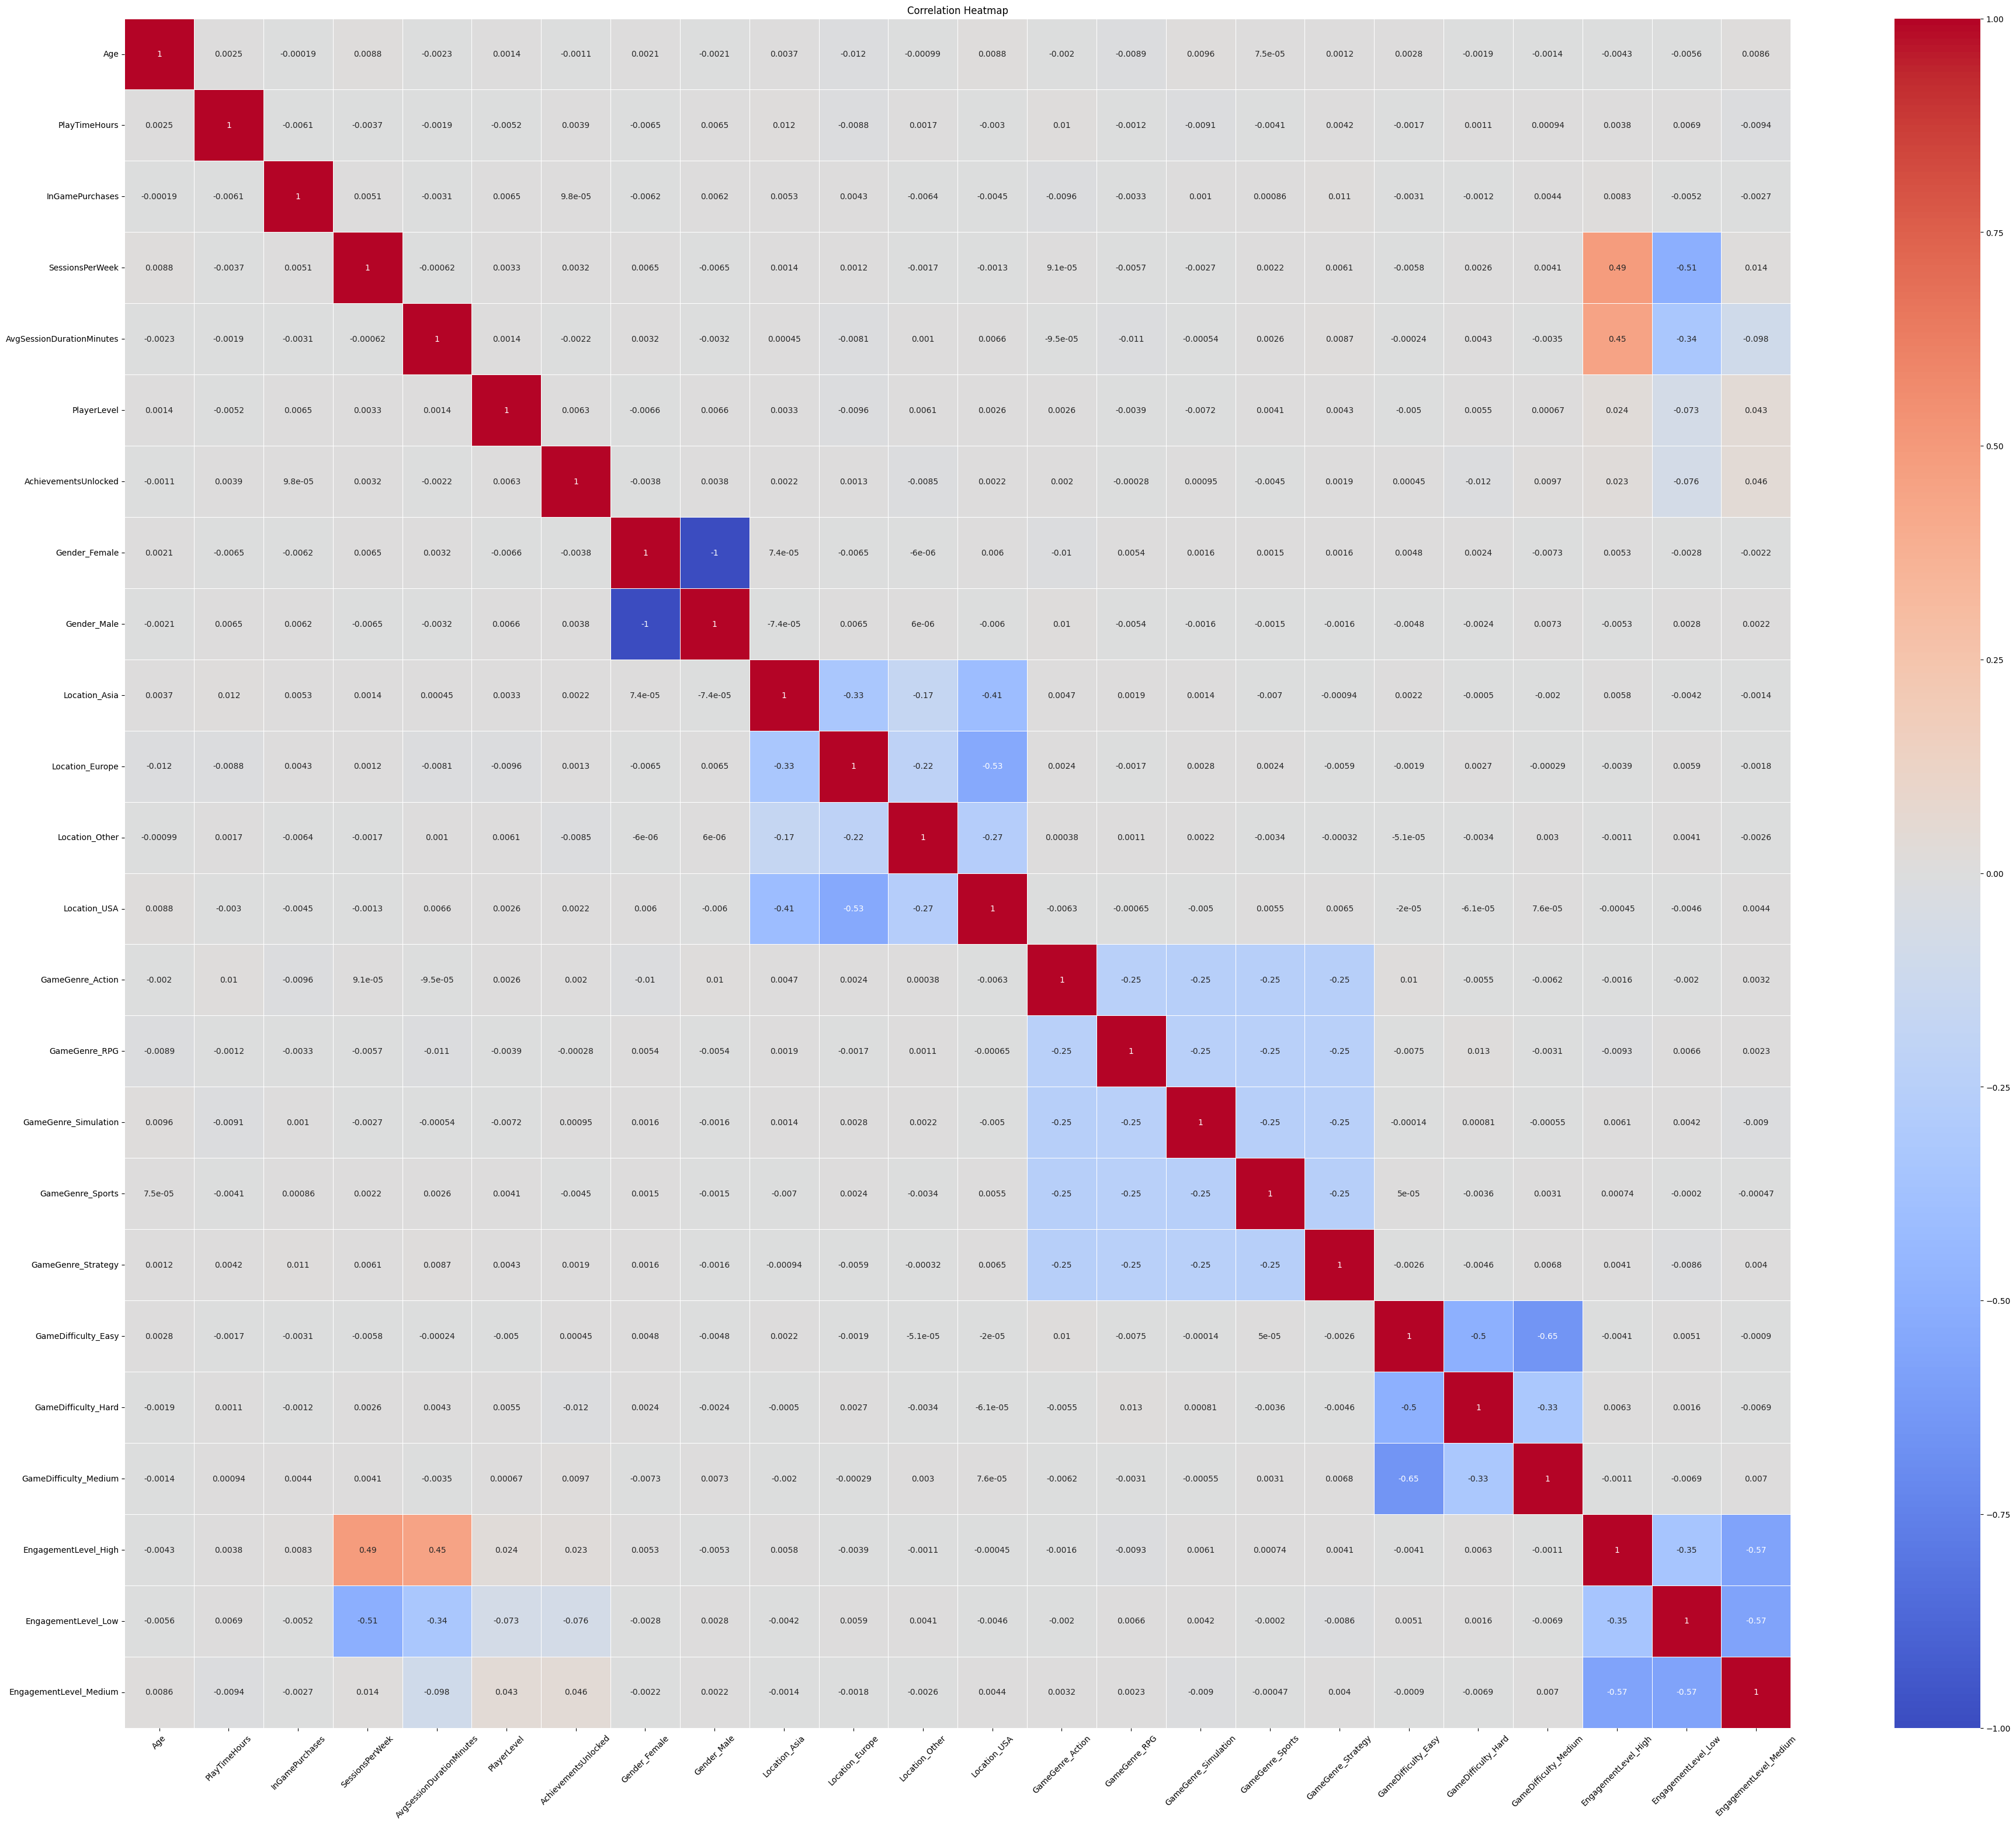

In [22]:
# Check for missing values (optional)
if df.isnull().sum().any():
    print("Missing values detected. Consider imputation.")

# Handle non-numeric columns (if necessary)
if not pd.api.types.is_numeric_dtype(df):
    df = pd.get_dummies(df)  # One-hot encoding for categorical columns

# Create the correlation matrix
try:
    corr_matrix = df.corr()
except:
    print("Error creating correlation matrix. Check data types.")

# Displaying the heatmap (with some adjustments)
plt.figure(figsize=(46, 38))  # Set figure size
sns.heatmap(corr_matrix, annot=True, linewidths=0.5, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")  # Add a title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability (optional)
plt.show()


In [23]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Define feature columns (exclude target variable)
feature_cols = [col for col in df.columns if col != 'EngagementLevel_High' and col != 'EngagementLevel_Low' and col != 'EngagementLevel_Medium']

# Define features and target
X = df[feature_cols]
y = df[['EngagementLevel_High', 'EngagementLevel_Low', 'EngagementLevel_Medium']]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
# Initialize a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the model to the data
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Measure Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Display the result
print(f"Decision Tree Classifier Accuracy: {accuracy * 100:.2f}%")

# Evaluate the model with a classification report
report = classification_report(y_test, y_pred, target_names=['EngagementLevel_High', 'EngagementLevel_Low', 'EngagementLevel_Medium'])
print(report)

Decision Tree Classifier Accuracy: 83.27%
                        precision    recall  f1-score   support

  EngagementLevel_High       0.80      0.82      0.81      3132
   EngagementLevel_Low       0.80      0.80      0.80      3069
EngagementLevel_Medium       0.87      0.86      0.86      5810

             micro avg       0.83      0.83      0.83     12011
             macro avg       0.82      0.83      0.82     12011
          weighted avg       0.83      0.83      0.83     12011
           samples avg       0.83      0.83      0.83     12011



In [25]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize a KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred_knn = knn.predict(X_test)

# Measure the accuracy of the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"K-NN Classifier Accuracy: {accuracy_knn * 100:.2f}%")

# Display the classification report for K-NN classifier
report_knn = classification_report(y_test, y_pred_knn, target_names=['EngagementLevel_High', 'EngagementLevel_Low', 'EngagementLevel_Medium'])
print(report_knn)

K-NN Classifier Accuracy: 75.89%
                        precision    recall  f1-score   support

  EngagementLevel_High       0.84      0.77      0.80      3132
   EngagementLevel_Low       0.81      0.63      0.71      3069
EngagementLevel_Medium       0.76      0.82      0.79      5810

             micro avg       0.79      0.76      0.77     12011
             macro avg       0.80      0.74      0.77     12011
          weighted avg       0.79      0.76      0.77     12011
           samples avg       0.76      0.76      0.76     12011



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
# Import the necessary library
from sklearn.linear_model import LogisticRegression

# Define your target
y_train_new = y_train['EngagementLevel_High']
y_test_new = y_test['EngagementLevel_High']

# Initialize a LogisticRegression
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)

# Fit the model to the training data
logreg.fit(X_train, y_train_new)

# Make predictions on the test data
y_pred_logreg = logreg.predict(X_test)

# Measure the accuracy of the model
accuracy_logreg = accuracy_score(y_test_new, y_pred_logreg)
print(f"Logistic Regression Classifier Accuracy: {accuracy_logreg * 100:.2f}%")

# Display the classification report for Logistic Regression classifier
report_logreg = classification_report(y_test_new, y_pred_logreg, target_names=['EngagementLevel_High', 'EngagementLevel_Other'])
print(report_logreg)

Logistic Regression Classifier Accuracy: 92.66%
                       precision    recall  f1-score   support

 EngagementLevel_High       0.94      0.97      0.95      8879
EngagementLevel_Other       0.90      0.81      0.85      3132

             accuracy                           0.93     12011
            macro avg       0.92      0.89      0.90     12011
         weighted avg       0.93      0.93      0.93     12011



In [27]:
from sklearn.ensemble import RandomForestClassifier

# Initialize a RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rfc.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rfc = rfc.predict(X_test)

# Measure the accuracy of the model
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
print(f"Random Forest Classifier Accuracy: {accuracy_rfc * 100:.2f}%")

# Display the classification report for Random Forest classifier
report_rfc = classification_report(y_test, y_pred_rfc, target_names=['EngagementLevel_High', 'EngagementLevel_Low', 'EngagementLevel_Medium'])
print(report_rfc)

Random Forest Classifier Accuracy: 88.47%
                        precision    recall  f1-score   support

  EngagementLevel_High       0.92      0.83      0.88      3132
   EngagementLevel_Low       0.91      0.84      0.87      3069
EngagementLevel_Medium       0.90      0.93      0.91      5810

             micro avg       0.91      0.88      0.89     12011
             macro avg       0.91      0.87      0.89     12011
          weighted avg       0.91      0.88      0.89     12011
           samples avg       0.88      0.88      0.88     12011



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
